In [ ]:
import numpy as np
import pandas as pd
from PIL import Image

In [ ]:
# EXTRACT DATA FROM GITHUB

df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true', 
                       sheet_name = 'Canada by Citizenship', 
                       skiprows = range(20),
                       skipfooter = 2)

print('Data has been downloaded and read into a dataframe')

print(df_can.head())

print(df_can.shape)


# CLEANSING DATA#

df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis = 1,inplace = True)
df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace = True)

df_can.columns = list(map(str,df_can.columns))
df_can.set_index('Country',inplace = True)
df_can['Total'] = df_can.sum(axis = 1)

years = list(map(str,range(1980,2014)))
print('data dimensions:', df_can.shape)



Data has been downloaded and read into a dataframe
         Type    Coverage          OdName  AREA  ...  2010  2011  2012  2013
0  Immigrants  Foreigners     Afghanistan   935  ...  1758  2203  2635  2004
1  Immigrants  Foreigners         Albania   908  ...   561   539   620   603
2  Immigrants  Foreigners         Algeria   903  ...  4752  4325  3774  4331
3  Immigrants  Foreigners  American Samoa   909  ...     0     0     0     0
4  Immigrants  Foreigners         Andorra   908  ...     0     0     1     1

[5 rows x 43 columns]
(195, 43)
data dimensions: (195, 38)


In [ ]:
#VISUALIZING DATA USING MATPLOTLIB

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('matplotlib version',mpl.__version__)


matplotlib version 3.2.2


Denmark:   32.26%
Norway:   19.24%
Sweden:   48.50%


Total number of tiles is 80000
      
      
Denmark:25805
Norway:15393
Sweden:38803

Waffle chart already populated

Denmark:   32.26%
Norway:   19.24%
Sweden:   48.50%


  Total number of tiles is 600
        
        
Denmark:194
Norway:115
Sweden:291

  Waffle chart already populated
  


<Figure size 432x288 with 0 Axes>

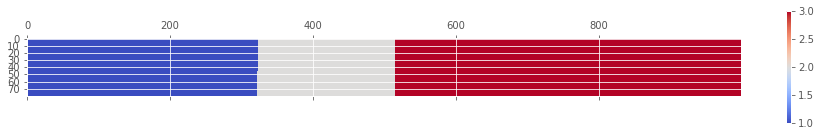

<Figure size 432x288 with 0 Axes>

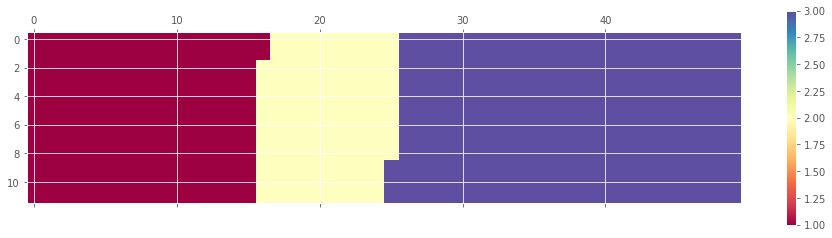

In [ ]:
#WAFFLE CHARTS PART OF MATPLOTLIB

#FILTER UNTUK ONLY DENMARK NORWAY SWEDEN
df_dsn = df_can.loc[['Denmark','Norway','Sweden'],:]
df_dsn 

#STEP 1 langkah pertama untuk membuat waffle adalah menentukan proporsi

total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) 
for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions) : 
  #print(df_dsn.index.values[i] + ':' + str(proportion))
  format_proportion = "{:.2f}".format(proportion*100)
  print(df_dsn.index.values[i] + ':   ' + str(format_proportion) + '%')


#STEP 2 menentukan ukuran keseluruhan dari waffle chart

width = 1000
height = 80

total_num_tiles = width * height
print(f"""

Total number of tiles is {total_num_tiles}
      
      """)


#STEP 3 mlangkah ketiga adalah menggunkan proporsi tiap kategori untuk menentukan jumlah ubin

tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
  print(df_dsn.index.values[i] + ':' + str(tiles))

#STEP 4 membuat matriks yang menyerupai waffle dan mengisinya

waffle_chart = np.zeros((height,width))

category_index = 0 
tile_index = 0

for col in range(width):
  for row in range(height):
    tile_index += 1
    #ketika dia denmark maka akan fill denmark, ketika norway fill norway dst
    if tile_index > sum(tiles_per_category[0:category_index]):
      category_index+=1
    waffle_chart[row, col]= category_index

print("""
Waffle chart already populated
""")

#STEP 5 create matplotlib

fig =  plt.figure()
colormap = plt.cm.coolwarm
# pilihan warna ada di https://matplotlib.org/stable/tutorials/colors/colormaps.html
# e.g   'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# STEP 6 agar bisa dinamis dibuat function

def create_waffle_chart(categories,values, height, width, colormap, value_sign=''):

  total_values = sum(df_dsn['Total'])
  category_proportions = [(float(value) / total_values) 
  for value in df_dsn['Total']]

  for i, proportion in enumerate(category_proportions) : 
    #print(df_dsn.index.values[i] + ':' + str(proportion))
    format_proportion = "{:.2f}".format(proportion*100)
    print(df_dsn.index.values[i] + ':   ' + str(format_proportion) + '%')

 
  total_num_tiles = width * height
  print(f"""

  Total number of tiles is {total_num_tiles}
        
        """)

  tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

  for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ':' + str(tiles))

  #STEP 4 membuat matriks yang menyerupai waffle dan mengisinya

  waffle_chart = np.zeros((height,width))

  category_index = 0 
  tile_index = 0

  for col in range(width):
    for row in range(height):
      tile_index += 1
      #ketika dia denmark maka akan fill denmark, ketika norway fill norway dst
      if tile_index > sum(tiles_per_category[0:category_index]):
        category_index+=1
      waffle_chart[row, col]= category_index

  print("""
  Waffle chart already populated
  """)

  fig =  plt.figure()
  plt.matshow(waffle_chart, cmap=colormap)
  plt.colorbar()

#step 7 call the function

width = 50
height = 12

categories = df_dsn.index.values
values = df_dsn['Total']

# pilihan warna ada di https://matplotlib.org/stable/tutorials/colors/colormaps.html
# e.g   'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
colormap = plt.cm.Spectral

create_waffle_chart(categories , values, height,width, colormap)

Wordcloud is installed and imported


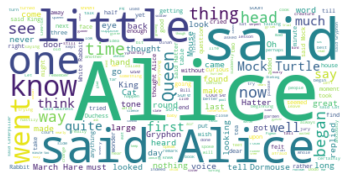

In [ ]:
#WORD CLOUDS 

# STEP 1 install and download some sample book document
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is installed and imported')

!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt

alice_novel = open('alice_novel.txt','r').read()
stopwords = set(STOPWORDS)

alice_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

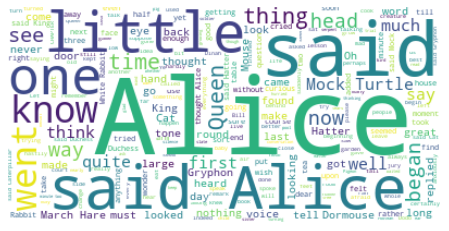

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(25)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


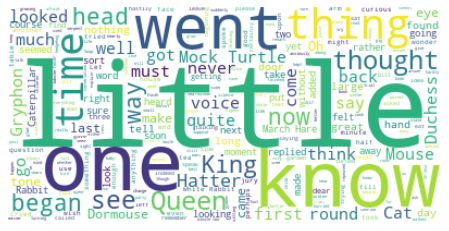

In [ ]:
#kata-kata sensor

stopwords.add('said')
stopwords.add('bastard')
stopwords.add('shit')
stopwords.add('damn it')
stopwords.add('we can\'t use sailor "words"')
stopwords.add('Alice')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(25)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()



Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Asvan Micahel Micahel Micahel Micahel Micahel Micahel Micahel Micahel Zulfikar Zulfikar Zulfikar Zulfikar Zulfikar Zulfikar Zulfikar Zulfikar Zulfikar Zulfikar Zulfikar Ruben Ruben Ruben Ruben Ruben Ruben Ruben Ruben Ruben Ruben Ruben Ruben Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila Dhila 


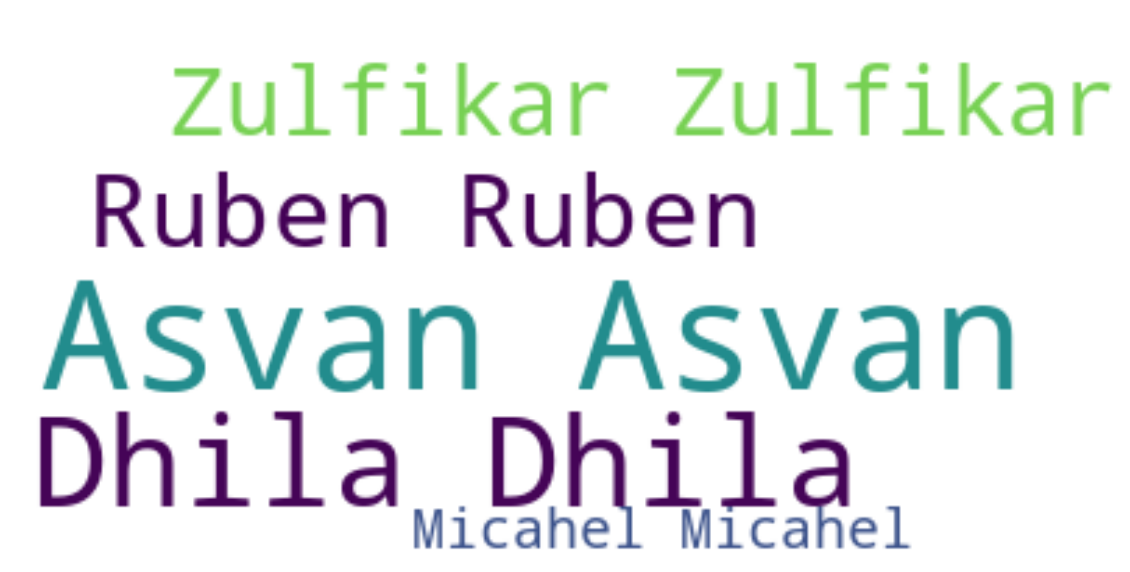

In [ ]:
max_words = 60
word_string= ''

total_immigration = df_can['Total'].sum()

for country in df_can.index.values:
  if len(country.split(' '))==1:
    repeat_num_times = int(df_can.loc[country,'Total']/float(total_immigration)*max_words)
    word_string= word_string + ((country + ' ')*repeat_num_times)

new_word_string = 'Asvan '*30 + 'Micahel ' * 8 + 'Zulfikar '*11 + 'Ruben ' * 12 + 'Dhila ' * 20 
print(new_word_string)
wordcloud = WordCloud(background_color='White').generate(new_word_string)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(28)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Seaborn installed and imported!


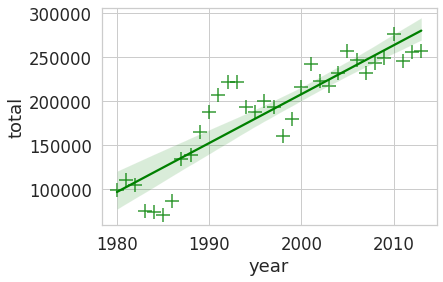

In [ ]:
import seaborn as sen

print('Seaborn installed and imported!')

# STEP 1 assign Dataset canada dan plot ke regresi

df_t = pd.DataFrame(df_can[years].sum(axis=0))
df_t.index = map(float,df_t.index)

df_t.reset_index(inplace = True)
df_t.columns = ['year','total']
df_t.head()


#cara membaca regresi ini adalah : 
# + -> koordinat dari data2 yang ada di df_t 
# garis yang ditengah adalah hasil regresi 
# margin of error di tandai dengan warna transparan

ax= sen.regplot(x='year',
                y='total',
                data=df_t, 
                color = 'green',
                marker='+'
                ,scatter_kws={'s':200}
                )


In [ ]:
df_countries = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
print(df_countries)

Country  Denmark  Norway  Sweden
1980         272     116     281
1981         293      77     308
1982         299     106     222
1983         106      51     176
1984          93      31     128
1985          73      54     158
1986          93      56     187
1987         109      80     198
1988         129      73     171
1989         129      76     182
1990         118      83     130
1991         111     103     167
1992         158      74     179
1993         186      92     203
1994          93      60     192
1995         111      65     176
1996          70      70     161
1997          83     104     151
1998          63      31     123
1999          81      36     170
2000          93      56     138
2001          81      78     184
2002          70      74     149
2003          89      77     161
2004          89      73     129
2005          62      57     205
2006         101      53     139
2007          97      73     193
2008         108      66     165
2009      

In [ ]:
df_t = pd.DataFrame(df_countries.sum(axis=1))
df_t.reset_index(inplace = True)
df_t.columns = ['year','total']
df_t = df_t['year'].astype(int)

plt.figure(figsize=(15,10))

sen.set(font_scale = 1.5)
sen.set_style('whitegrid')


<Figure size 1080x720 with 0 Axes>

In [ ]:
ax= sen.regplot(x='year',
                y='total',
                data=df_t, 
                color = 'green',
                marker='+'
                ,scatter_kws={'s':200}
                )

ax.set(xlabel = 'year',ylabel='Total Immigration')
ax.set_title('Total immigration from Denmark, Sweden, and Norway to canada from 1980-2013')


KeyError: ignored